In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['pdf.fonttype'] = 42

In [2]:
df = pd.read_csv("H1-B_employment_2019.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22501 entries, 0 to 22500
Data columns (total 11 columns):
Fiscal Year             22501 non-null int64
Employer                22500 non-null object
Initial Approvals       22501 non-null object
Initial Denials         22501 non-null int64
Continuing Approvals    22501 non-null object
Continuing Denials      22501 non-null int64
NAICS                   22501 non-null int64
Tax ID                  22466 non-null float64
State                   22500 non-null object
City                    22501 non-null object
ZIP                     22500 non-null float64
dtypes: float64(2), int64(4), object(5)
memory usage: 1.9+ MB


In [4]:
df.NAICS.value_counts()

54    11139
33     1639
52     1467
62     1418
51     1311
61     1156
42      619
32      565
99      391
56      374
23      349
44      348
53      242
31      233
81      211
45      188
72      166
48      147
22      119
71      104
92      101
21       85
55       59
11       39
49       31
Name: NAICS, dtype: int64

In [5]:
df_state = pd.DataFrame(df.State.value_counts())

In [6]:
df_state = df_state.reset_index()

In [7]:
df_state.rename(columns={"index": "State_name", "State": "Number"})

,State_name,Number
0,CA,4336
1,NY,2727
2,TX,2244
3,NJ,1841
4,MA,1106
5,IL,1065
6,VA,916
7,MI,832
8,FL,776
9,PA,722


In [8]:
df_state.to_csv("state_number.csv", index=False)

In [11]:
colnames=['Code','Industry']
df_NAICS = pd.read_csv("NAICS.csv", names=colnames)

In [12]:
df_NAICS

,Code,Industry
0,11,"Agriculture, Forestry, Fishing and Hunting"
1,21,"Mining, Quarrying, and Oil and Gas Extraction"
2,22,Utilities
3,23,Construction
4,31,Manufacturing
5,32,Manufacturing
6,33,Manufacturing
7,42,Wholesale Trade
8,44,Retail Trade
9,45,Retail Trade


In [20]:
df_employer = df[['Employer','NAICS']]

In [24]:
df_merge = pd.merge(df_NAICS, df_employer , left_on='Code', right_on='NAICS')
df_merge.head()

,Code,Industry,Employer,NAICS
0,11,"Agriculture, Forestry, Fishing and Hunting",JEFF DAVIS PEANUT & GRAIN INC,11
1,11,"Agriculture, Forestry, Fishing and Hunting",THIRD SECTOR NEW ENGLAND INC DBA,11
2,11,"Agriculture, Forestry, Fishing and Hunting",THE AMERICAN KENNEL CLUB,11
3,11,"Agriculture, Forestry, Fishing and Hunting",DAKOTA TURKEY GROWERS LLC,11
4,11,"Agriculture, Forestry, Fishing and Hunting",GROWER DIRECT NUT CO INC,11


In [38]:
df_Industry = pd.DataFrame(df_merge.Industry.value_counts())
df_Industry = df_Industry.reset_index()
df_Industry.head()

,index,Industry
0,"Professional, Scientific, and Technical Services",11139
1,Manufacturing,2437
2,Finance and Insurance,1467
3,Health Care and Social Assistance,1418
4,Information,1311


In [46]:
df_Industry = df_Industry.rename(columns={"index": "Industry", "Industry": "Number"})
df_Industry['Number'].astype(float)

0     11139
1      2437
2      1467
3      1418
4      1311
5      1156
6       619
7       536
8       374
9       349
10      242
11      211
12      178
13      166
14      119
15      104
16      101
17       85
18       59
19       39
Name: Number, dtype: int64

In [72]:
df_Industry['Pct'] = round(100 * df_Industry['Number'] / len(df),2)
df_Industry.Pct

0     49.50
1     10.83
2      6.52
3      6.30
4      5.83
5      5.14
6      2.75
7      2.38
8      1.66
9      1.55
10     1.08
11     0.94
12     0.79
13     0.74
14     0.53
15     0.46
16     0.45
17     0.38
18     0.26
19     0.17
Name: Pct, dtype: float64

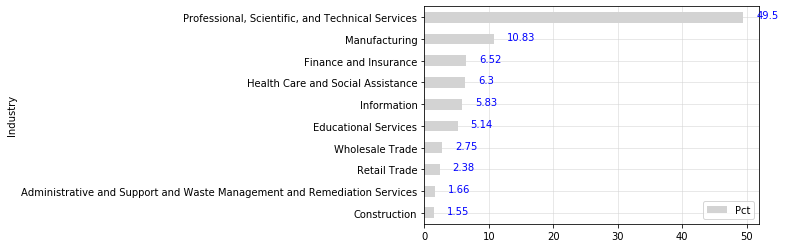

In [115]:
fig, ax = plt.subplots()

df_Industry.head(10).sort_values(by='Pct').plot(kind='barh',x = 'Industry',y='Pct', ax=ax, color='lightgrey')
ax.grid(which='major', linestyle='-', linewidth='0.5', color='lightgrey')

for i, v in enumerate(df_Industry.head(10).Pct.sort_values()):
    ax.text(v + 2, i - 0.05 , str(v), color='blue')
    
plt.savefig("industry.pdf", bbox_inches = 'tight', transparent=True)